# Let's Get Started:

In [1]:
import pandas as pd

## Load the COVID-19 Dataset and Some Exploration

In [4]:
df = pd.read_csv(r"C:\Users\TariK\COVID-19 Zeitreihenanalyse\covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Making the Dates, actual DATES!!!!

In [5]:
df.ObservationDate[1]

'01/22/2020'

In [6]:
from pandas import datetime

In [11]:
def parser(x):
    return datetime.strptime(x, '%m/%d/%Y')

df = pd.read_csv(r"C:\Users\TariK\COVID-19 Zeitreihenanalyse\covid_19_data.csv", index_col=1, parse_dates=[1], date_parser=parser)
df.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Handling Missing Values

In [12]:
# Handling missing values
print(df.shape)
df.isnull().sum()

(53927, 7)


SNo                   0
Province/State    21057
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [13]:
# As Province/State has many missing values, let's drop it (ASSIGN to df AGAIN!!!)
df = df.drop(["Province/State"], axis=1)

In [14]:
# Confirm that there is no more NaN values
df.isnull().sum()

SNo               0
Country/Region    0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

## Extracting Some Statistics

In [15]:
#Maximum Confirmed
maximum_confirmed = df[df.Confirmed == df.Confirmed.max()]
print(maximum_confirmed[['Country/Region','Confirmed']])
print('\n')

#Maximum Deaths
maximum_deaths = df[df.Deaths == df.Deaths.max()]
print(maximum_deaths[['Country/Region','Deaths']])
print('\n')

#Maximum Recovered
maximum_recovered = df[df.Recovered == df.Recovered.max()]
print(maximum_recovered[['Country/Region','Recovered']])

                Country/Region  Confirmed
ObservationDate                          
2020-05-31              Russia   405843.0


                Country/Region   Deaths
ObservationDate                        
2020-06-10                  UK  41128.0


                Country/Region  Recovered
ObservationDate                          
2020-06-30                  US   720631.0


## Visualizing COVID19 dataset for the World!

In [20]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

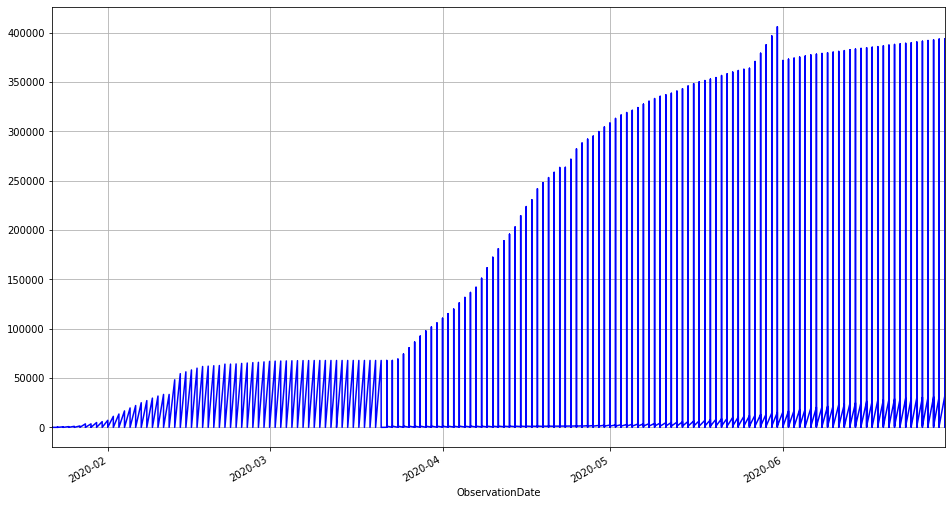

In [21]:
fig=plt.figure(figsize=(16, 9))
confirmed = df['Confirmed']
confirmed.plot(color='b')
plt.grid()

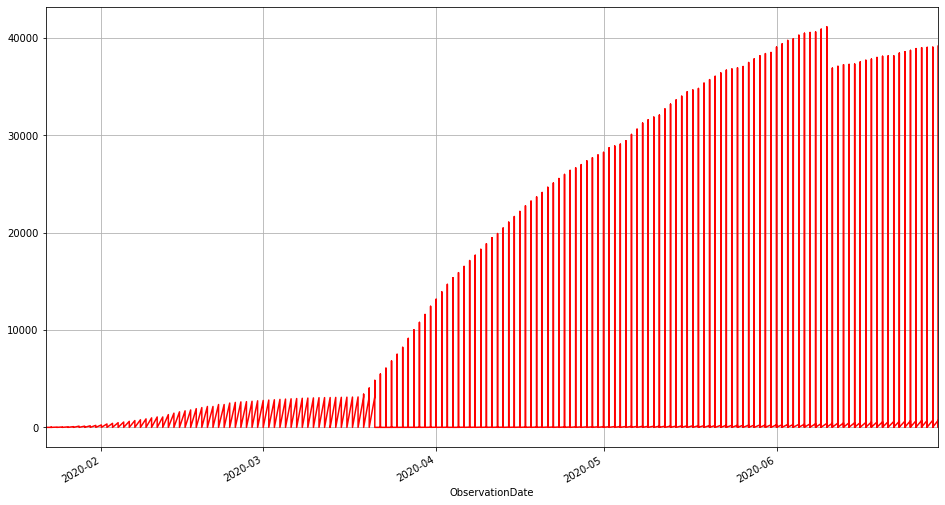

In [18]:
fig=plt.figure(figsize=(16, 9))
deaths = df['Deaths']
deaths.plot(color='r')
plt.grid()

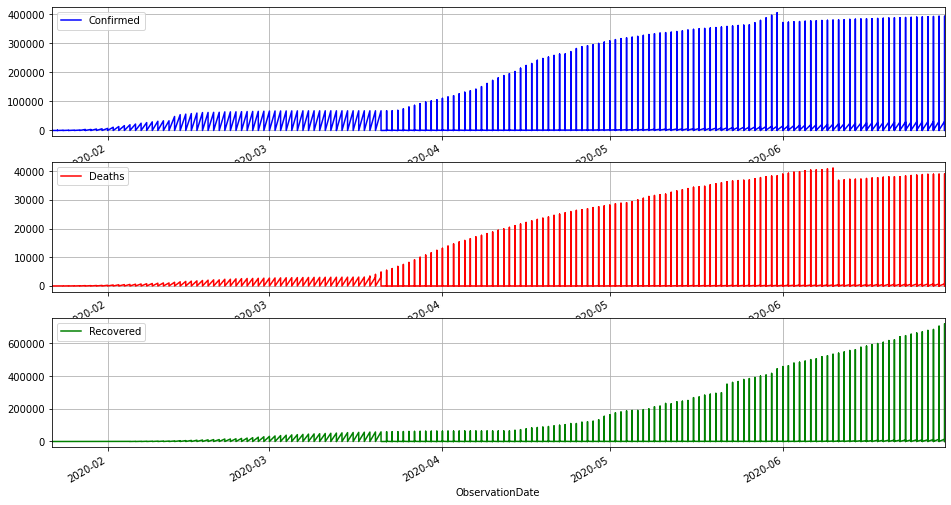

In [22]:
# Grab each column
Confirmed = df['Confirmed']
Deaths = df['Deaths']
Recovered = df['Recovered']

fig=plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
Confirmed.plot(color='b', label='Confirmed')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
Deaths.plot(color='r', label='Deaths')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
Recovered.plot(color='g', label='Recovered')
plt.grid()
plt.legend()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000154C4A4BC48>,
      dtype=object)

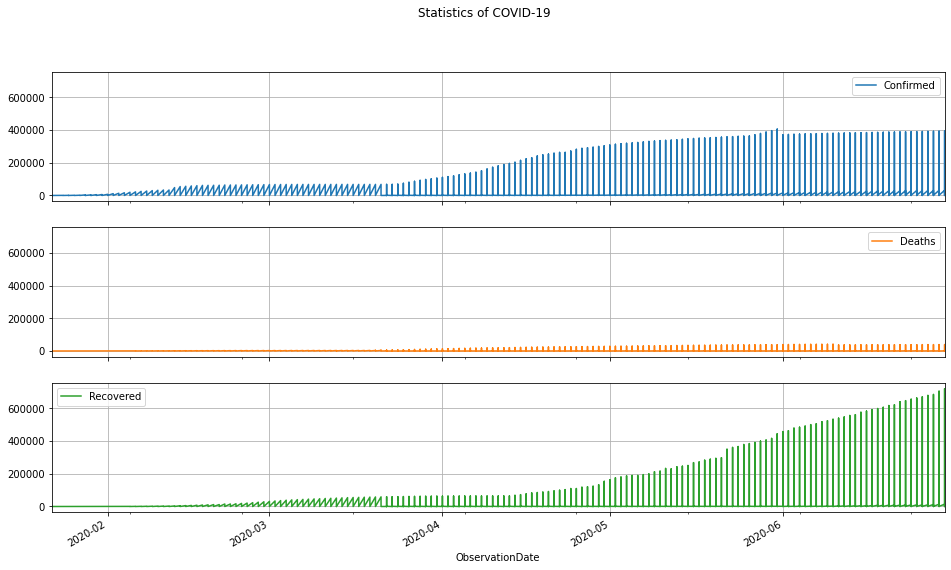

In [23]:
df.plot(subplots=True,figsize=(16, 9), sharey=True,title="Statistics of COVID-19", y=[3,4,5], grid=True)

## Visualizing COVID19 dataset for a Country/Region!

In [24]:
country_names = df['Country/Region'].unique()
print(country_names)

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia

In [25]:
def filter_COVID(df, country):
    df= df[df['Country/Region'] == country]
    return df

**Function to visualise the statistics for a given Country/Region:**

In [28]:
def visualise_COVID(df, country):
    # Get the unique names of the Country/Region
    country_names = df['Country/Region'].unique()
    # Make sure that the country exists in the dataset already
    if country in country_names:
        #Filter the entire dataset and only keep the records for the arguement country
        df_filtered = filter_COVID(df, country)
        fig=plt.figure(figsize=(16, 9))
        df_filtered.plot(subplots=True,figsize=(10, 9), sharey=True,title="Statistics of COVID-19", y=[3,4,5], grid=True)

<Figure size 1152x648 with 0 Axes>

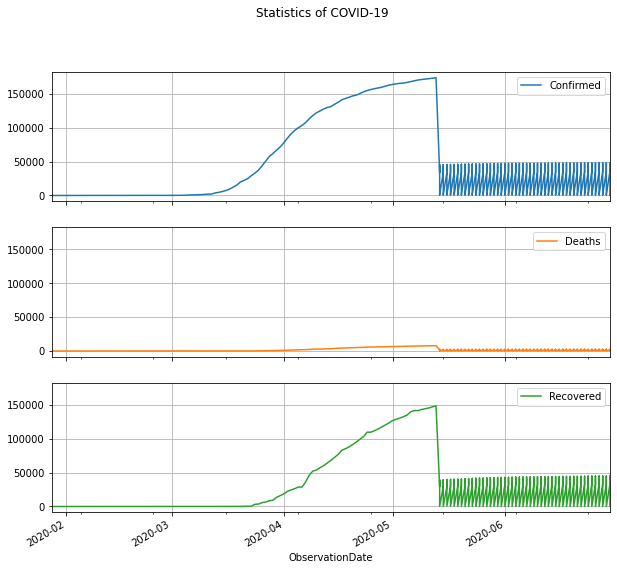

In [29]:
visualise_COVID(df, 'Germany')

## Forecasting using ARIMA

In [37]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse

In [31]:
# We will prepare the train and test data for the confirmed cases of a country
df_filtered = filter_COVID(df, 'Germany')
df_filtered = df_filtered['Confirmed']
df_filtered = df_filtered.values
size = int(len(df_filtered) * 0.80)
train, test = df_filtered[0:size], df_filtered[size:len(df_filtered)]

In [32]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
# Let us pring the aic value
print(model_fit.aic)

16313.619309197686


In [38]:
predictions = model_fit.forecast(steps=test.size)[0]
error = mse(test, predictions)

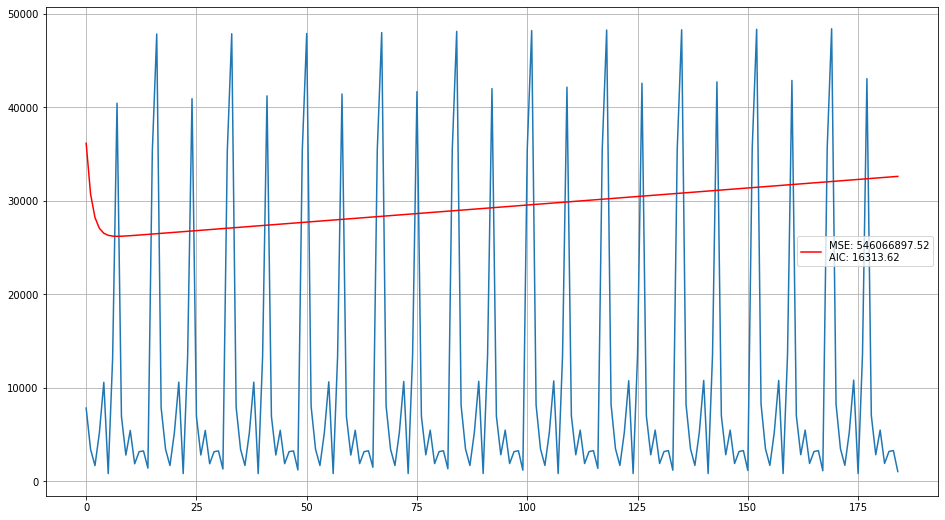

In [41]:
fig=plt.figure(figsize=(16, 9))
plt.plot(test)
plt.plot(predictions, color='red', label = 'MSE: %.2f' % error+'\n'+'AIC: %.2f' % model_fit.aic)
plt.legend()
plt.grid()

**So terrible**

### Finding the best combination of (p,d,q)

In [42]:
import itertools as it
p=d=q=range(0,6)
pdq = list(it.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [43]:
import warnings
warnings.filterwarnings('ignore')
minimum_aic = 100000000
best_param = None
for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        current_aic = model_fit.aic
        if current_aic < minimum_aic:
            minimum_aic = current_aic
            best_param = param
        print(param)
        print("Current aic:", model_fit.aic)
    except:
        continue
print("Best parameters are %s with the aic value of %.2f" % (str(best_param), minimum_aic))

(0, 0, 0)
Current aic: 17525.534120223558
(0, 0, 1)
Current aic: 16870.575940654693
(0, 0, 2)
Current aic: 16805.380047065002
(0, 0, 3)
Current aic: 16551.126162828674
(0, 0, 4)
Current aic: 16415.45205372786
(0, 0, 5)
Current aic: 16395.77756909563
(0, 1, 0)
Current aic: 16402.494505211176
(0, 1, 1)
Current aic: 16376.527012494276
(0, 1, 2)
Current aic: 16250.819179491167
(0, 1, 3)
Current aic: 16251.198446244332
(0, 1, 4)
Current aic: 16253.083989671593
(0, 1, 5)
Current aic: 16227.98205807997
(0, 2, 0)
Current aic: 16964.87505739359
(0, 2, 1)
Current aic: 16389.844250252856
(0, 2, 2)
Current aic: 16364.752689202298
(0, 2, 3)
Current aic: 16240.166305501398
(0, 2, 4)
Current aic: 16240.496481263512
(0, 2, 5)
Current aic: 16242.371553936158
(1, 0, 0)
Current aic: 16385.107351065315
(1, 0, 1)
Current aic: 16379.527570091164
(1, 0, 2)
Current aic: 16268.733459718156
(1, 0, 3)
Current aic: 16268.78236890155
(1, 0, 4)
Current aic: 16270.602202637669
(1, 0, 5)
Current aic: 16261.9447112300

In [44]:
model = ARIMA(train, order=(5,1,5))
model_fit = model.fit()
# Let us pring the aic value
print(model_fit.aic)

15770.897582462672


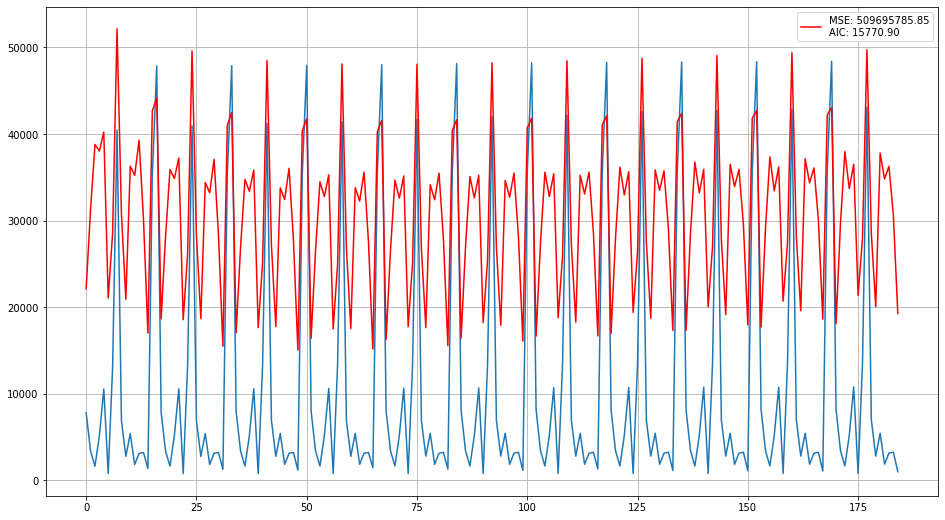

In [45]:
predictions = model_fit.forecast(steps=test.size)[0]
error = mse(test,predictions)
fig=plt.figure(figsize=(16, 9))
plt.plot(test)
plt.plot(predictions, color='red', label="MSE: %.2f" % error+'\n'+"AIC: %.2f" % model_fit.aic)
plt.legend()
plt.grid()

## Conclusions

ARIMA seems to be a reasonable model for time series forcasting. Models with slightly higher AIC value can indeed make better generalisations and produce a lower MSE error during testing!